In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = 'BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_cytof_fixedDCm5trfixed.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,426.272052,72.323616,49.742895,361.665501,19.269655,121.355239,116.558845,24.893288,97.600087,53.537293,...,0.0592,0.1142,0.0890,0.0029,0.097,0.095,0.019,0.089,0.054,0.0002
healthy_NU-14-bulk-PBMC,477.972932,118.712490,43.151935,467.951141,21.432662,114.420894,89.275187,23.744648,120.130106,46.228560,...,0.0844,0.0783,0.0996,0.0014,0.070,0.069,0.012,0.103,0.028,0.0001
healthy_NU-24-bulk-PBMC,639.671016,84.073688,40.998135,324.499712,16.794414,129.683513,113.231812,23.656056,113.905498,47.350567,...,0.0492,0.1510,0.0863,0.0050,0.122,0.146,0.010,0.072,0.045,0.0005
healthy_NU-31-bulk-PBMC,476.608171,87.374142,42.654327,594.338083,26.684424,114.812973,114.678223,26.017875,101.422825,45.952316,...,0.0558,0.1080,0.0840,0.0012,0.069,0.099,0.008,0.073,0.049,0.0001
healthy_NU-49-bulk-PBMC,531.930500,103.275266,41.871135,320.210369,20.927356,99.416938,108.680213,24.658069,100.364205,49.416930,...,0.0764,0.0984,0.1080,0.0019,0.084,0.166,0.012,0.082,0.045,0.0001
healthy_NU-50-bulk-PBMC,365.709899,56.926198,64.578980,402.117559,21.295937,201.110771,143.063795,25.814863,120.865198,65.863863,...,0.0566,0.0620,0.0404,0.0027,0.043,0.059,0.009,0.035,0.018,0.0013
healthy_NU-51-bulk-PBMC,403.278987,75.303689,37.797474,515.007445,19.370827,177.921469,126.647713,26.304241,104.990735,48.202690,...,0.0650,0.1040,0.0520,0.0018,0.061,0.071,0.004,0.030,0.021,0.0002


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)

df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

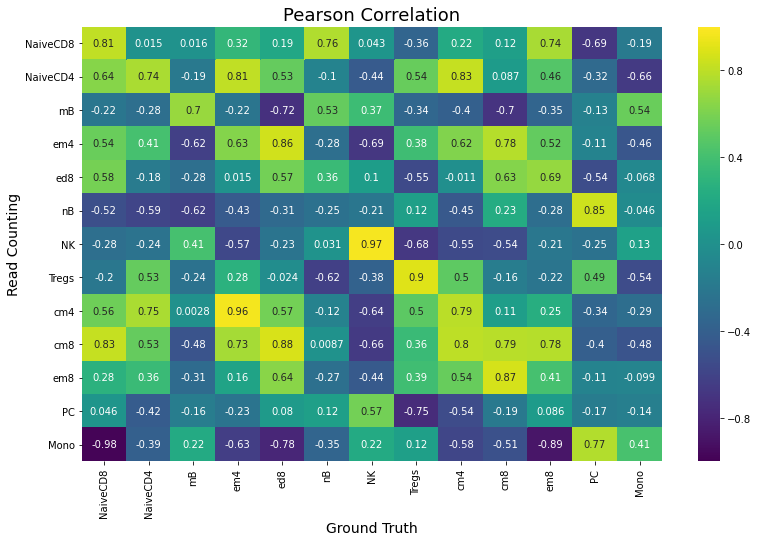

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=14)
ax.set_ylabel('Read Counting', fontsize=14)
ax.set_title('Pearson Correlation', fontsize=18)
plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

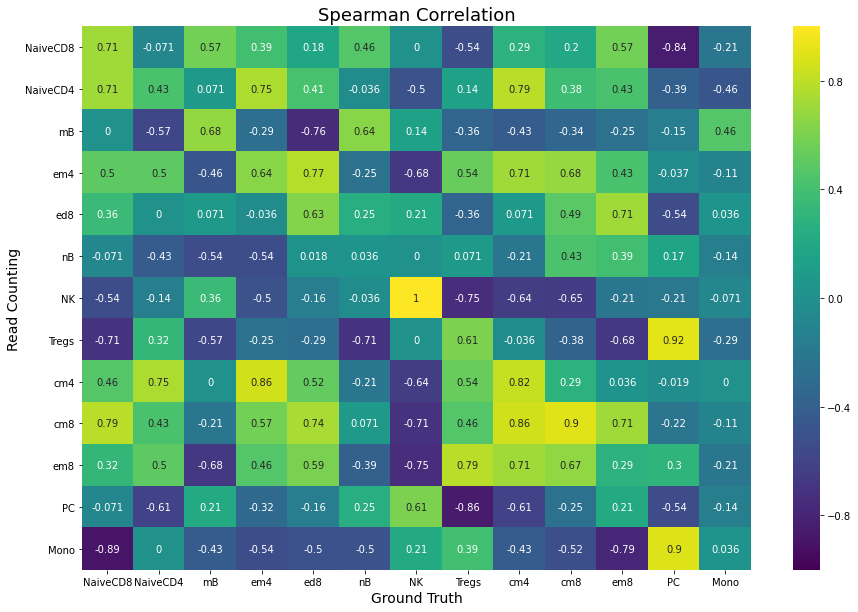

In [6]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)
plt.savefig(file + '_spearman.pdf', bbox_inches='tight')